In [199]:
# import libraries 
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [200]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [162]:
#read in the CSV as a dataframe 
df = pd.read_csv('modified_fifa_data.csv', index_col = 1)
df.head()

,Unnamed: 0,Name,Age,Height_Cm,Weight_Kgs,Positions,Nationality,Overall_Rating,Potential,Value_Euro,...,Ldm,Cdm,Rdm,Rwb,Lb,Lcb,Cb,Rcb,Rb,Original_Position
Id,,,,,,,,,,,,,,,,,,,,,
158023,0,L. Messi,31,170.18,72.1,FW,Argentina,94,94,110500000.0,...,61+2,61+2,61+2,64+2,59+2,48+2,48+2,48+2,59+2,"CF,RW,ST"
190460,1,C. Eriksen,27,154.94,76.2,MF,Denmark,88,89,69500000.0,...,71+3,71+3,71+3,71+3,66+3,57+3,57+3,57+3,66+3,"CAM,RM,CM"
195864,2,P. Pogba,25,190.50,83.9,MF,France,88,91,73000000.0,...,77+3,77+3,77+3,76+3,74+3,72+3,72+3,72+3,74+3,"CM,CAM"
198219,3,L. Insigne,27,162.56,59.0,MF,Italy,88,88,62000000.0,...,58+3,58+3,58+3,63+3,58+3,44+3,44+3,44+3,58+3,"LW,ST"
201024,4,K. Koulibaly,27,187.96,88.9,DF,Senegal,88,91,60000000.0,...,77+3,77+3,77+3,73+3,76+3,85+3,85+3,85+3,76+3,CB


In [163]:
df.drop("Unnamed: 0",axis=1, inplace=True)
df.head()

,Name,Age,Height_Cm,Weight_Kgs,Positions,Nationality,Overall_Rating,Potential,Value_Euro,International_Reputation_1_5,...,Ldm,Cdm,Rdm,Rwb,Lb,Lcb,Cb,Rcb,Rb,Original_Position
Id,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,31,170.18,72.1,FW,Argentina,94,94,110500000.0,5,...,61+2,61+2,61+2,64+2,59+2,48+2,48+2,48+2,59+2,"CF,RW,ST"
190460,C. Eriksen,27,154.94,76.2,MF,Denmark,88,89,69500000.0,3,...,71+3,71+3,71+3,71+3,66+3,57+3,57+3,57+3,66+3,"CAM,RM,CM"
195864,P. Pogba,25,190.50,83.9,MF,France,88,91,73000000.0,4,...,77+3,77+3,77+3,76+3,74+3,72+3,72+3,72+3,74+3,"CM,CAM"
198219,L. Insigne,27,162.56,59.0,MF,Italy,88,88,62000000.0,3,...,58+3,58+3,58+3,63+3,58+3,44+3,44+3,44+3,58+3,"LW,ST"
201024,K. Koulibaly,27,187.96,88.9,DF,Senegal,88,91,60000000.0,3,...,77+3,77+3,77+3,73+3,76+3,85+3,85+3,85+3,76+3,CB


In [164]:
df.shape


(17954, 75)

In [165]:
name_df = df['Name']
name_df

Id
158023          L. Messi
190460        C. Eriksen
195864          P. Pogba
198219        L. Insigne
201024      K. Koulibaly
               ...      
204322       R. McKenzie
239762         M. Sipľak
235155        J. Bekkema
244883        A. Al Yami
247187    Júnior Brumado
Name: Name, Length: 17954, dtype: object

In [166]:
nat_df = df['Nationality']
nat_df

Id
158023       Argentina
190460         Denmark
195864          France
198219           Italy
201024         Senegal
              ...     
204322        Scotland
239762        Slovakia
235155     Netherlands
244883    Saudi Arabia
247187          Brazil
Name: Nationality, Length: 17954, dtype: object

In [167]:
df_demo=df.filter(["Age","Height_Cm","Weight_Kgs","Value_Euro",''],axis=1)
df_demo.dropna()

,Age,Height_Cm,Weight_Kgs,Value_Euro
Id,,,,
158023,31,170.18,72.1,110500000.0
190460,27,154.94,76.2,69500000.0
195864,25,190.50,83.9,73000000.0
198219,27,162.56,59.0,62000000.0
201024,27,187.96,88.9,60000000.0
...,...,...,...,...
204322,25,175.26,74.8,975000.0
239762,23,182.88,79.8,190000.0
235155,22,185.42,89.8,170000.0


In [168]:
df_skills=df.filter(["Crossing","Finishing","Heading_Accuracy","Short_Passing","Volleys","Dribbling","Curve","Freekick_Accuracy","Long_Passing","Ball_Control","Acceleration","Sprint_Speed","Agility","Reactions","Balance","Shot_Power","Jumping","Stamina","Strength","Long_Shots","Aggression","Interceptions","Positioning","Vision","Penalties","Composure","Marking","Standing_Tackle","Sliding_Tackle","Value_Euro"],axis=1)
df_skills.head()

,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Dribbling,Curve,Freekick_Accuracy,Long_Passing,Ball_Control,...,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing_Tackle,Sliding_Tackle,Value_Euro
Id,,,,,,,,,,,,,,,,,,,,,
158023,86,95,70,92,86,97,93,94,89,96,...,48,22,94,94,75,96,33,28,26,110500000.0
190460,88,81,52,91,80,84,86,87,89,91,...,46,56,84,91,67,88,59,57,22,69500000.0
195864,80,75,75,86,85,87,85,82,90,90,...,78,64,82,88,82,87,63,67,67,73000000.0
198219,86,77,56,85,74,90,87,77,78,93,...,34,26,83,87,61,83,51,24,22,62000000.0
201024,30,22,83,68,14,69,28,28,60,63,...,87,88,24,49,33,80,91,88,87,60000000.0


In [169]:
df_DF=df[df.Positions=="DF"]
df_DF.drop(['Name', 'Nationality'], axis=1, inplace=True)
df_DF

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Age,Height_Cm,Weight_Kgs,Positions,Overall_Rating,Potential,Value_Euro,International_Reputation_1_5,Skill_Moves_1_5,Work_Rate,...,Ldm,Cdm,Rdm,Rwb,Lb,Lcb,Cb,Rcb,Rb,Original_Position
Id,,,,,,,,,,,,,,,,,,,,,
201024,27,187.96,88.9,DF,88,91,60000000.0,3,2,High/ High,...,77+3,77+3,77+3,73+3,76+3,85+3,85+3,85+3,76+3,CB
203376,27,193.04,92.1,DF,88,90,59500000.0,3,2,Medium/ Medium,...,82+3,82+3,82+3,78+3,80+3,86+3,86+3,86+3,80+3,CB
231747,20,152.40,73.0,DF,88,95,81000000.0,3,5,High/ Medium,...,62+3,62+3,62+3,66+3,62+3,54+3,54+3,54+3,62+3,"RW,ST,RM"
209331,26,175.26,71.2,DF,89,90,78500000.0,3,4,High/ Medium,...,66+3,66+3,66+3,70+3,66+3,57+3,57+3,57+3,66+3,"RW,ST"
232363,24,187.96,79.8,DF,86,93,53500000.0,1,2,Medium/ High,...,79+2,79+2,79+2,74+2,77+2,84+2,84+2,84+2,77+2,CB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138956,34,187.96,84.8,DF,90,90,31000000.0,4,2,Medium/ High,...,76+3,76+3,76+3,74+3,77+3,86+3,86+3,86+3,77+3,CB
155862,32,182.88,82.1,DF,90,90,44000000.0,4,3,High/ Medium,...,84+3,84+3,84+3,81+3,83+3,87+3,87+3,87+3,83+3,CB
182493,33,187.96,78.0,DF,90,90,44000000.0,3,2,Medium/ High,...,81+3,81+3,81+3,76+3,79+3,87+3,87+3,87+3,79+3,CB


In [170]:
df_DF.drop(['Name', 'Nationality'], axis=1, inplace=True)
df_DF

KeyError: "['Name' 'Nationality'] not found in axis"

In [171]:
df_FW=df[df.Positions=="FW"]
df_FW.drop(['Name', 'Nationality'], axis=1, inplace=True)
df_FW

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Age,Height_Cm,Weight_Kgs,Positions,Overall_Rating,Potential,Value_Euro,International_Reputation_1_5,Skill_Moves_1_5,Work_Rate,...,Ldm,Cdm,Rdm,Rwb,Lb,Lcb,Cb,Rcb,Rb,Original_Position
Id,,,,,,,,,,,,,,,,,,,,,
158023,31,170.18,72.1,FW,94,94,110500000.0,5,4,Medium/ Low,...,61+2,61+2,61+2,64+2,59+2,48+2,48+2,48+2,59+2,"CF,RW,ST"
153079,30,172.72,69.9,FW,89,89,64500000.0,4,4,High/ Medium,...,56+3,56+3,56+3,58+3,53+3,47+3,47+3,47+3,53+3,ST
179813,32,185.42,77.1,FW,89,89,60000000.0,4,3,High/ High,...,65+3,65+3,65+3,67+3,65+3,63+3,63+3,63+3,65+3,ST
194765,27,175.26,73.0,FW,89,90,78000000.0,4,4,High/ High,...,70+3,70+3,70+3,72+3,70+3,65+3,65+3,65+3,70+3,"CF,ST"
167664,31,185.42,88.9,FW,87,87,48500000.0,4,3,High/ Medium,...,53+3,53+3,53+3,55+3,51+3,48+3,48+3,48+3,51+3,ST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176580,32,182.88,86.2,FW,91,91,80000000.0,5,3,High/ Medium,...,68+5,68+5,68+5,69+5,66+5,63+5,63+5,63+5,66+5,ST
20801,34,187.96,83.0,FW,94,94,77000000.0,5,5,High/ Low,...,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,"ST,LW"
232225,20,193.04,87.1,FW,67,79,1400000.0,1,2,Medium/ High,...,45+2,45+2,45+2,46+2,46+2,49+2,49+2,49+2,46+2,ST


In [172]:
df_GK=df[df.Positions=="GK"]
df_GK.drop(['Name', 'Nationality'], axis=1, inplace=True)
df_GK

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Age,Height_Cm,Weight_Kgs,Positions,Overall_Rating,Potential,Value_Euro,International_Reputation_1_5,Skill_Moves_1_5,Work_Rate,...,Ldm,Cdm,Rdm,Rwb,Lb,Lcb,Cb,Rcb,Rb,Original_Position
Id,,,,,,,,,,,,,,,,,,,,,
167495,32,193.04,92.1,GK,89,89,38000000.0,5,1,Medium/ Medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK
192119,26,198.12,96.2,GK,89,90,53500000.0,4,1,Medium/ Medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK
192448,26,187.96,84.8,GK,89,92,58000000.0,3,1,Medium/ Medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK
193041,32,185.42,79.8,GK,87,87,30500000.0,3,1,Medium/ Medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK
206585,24,185.42,84.8,GK,84,90,31000000.0,1,1,Medium/ Medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162835,34,193.04,92.1,GK,88,88,30000000.0,3,1,Medium/ Medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK
167948,32,187.96,82.1,GK,88,88,36000000.0,4,1,Medium/ Medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK
200389,26,187.96,87.1,GK,90,93,68000000.0,3,1,Medium/ Medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK


In [173]:
df_MF=df[df.Positions=="MF"]
df_MF.drop(['Name', 'Nationality'], axis=1, inplace=True)
df_MF

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Age,Height_Cm,Weight_Kgs,Positions,Overall_Rating,Potential,Value_Euro,International_Reputation_1_5,Skill_Moves_1_5,Work_Rate,...,Ldm,Cdm,Rdm,Rwb,Lb,Lcb,Cb,Rcb,Rb,Original_Position
Id,,,,,,,,,,,,,,,,,,,,,
190460,27,154.94,76.2,MF,88,89,69500000.0,3,4,High/ Medium,...,71+3,71+3,71+3,71+3,66+3,57+3,57+3,57+3,66+3,"CAM,RM,CM"
195864,25,190.50,83.9,MF,88,91,73000000.0,4,5,High/ Medium,...,77+3,77+3,77+3,76+3,74+3,72+3,72+3,72+3,74+3,"CM,CAM"
198219,27,162.56,59.0,MF,88,88,62000000.0,3,4,High/ Medium,...,58+3,58+3,58+3,63+3,58+3,44+3,44+3,44+3,58+3,"LW,ST"
189511,30,187.96,76.2,MF,89,89,51500000.0,4,3,Medium/ Medium,...,86+3,86+3,86+3,79+3,78+3,82+3,82+3,82+3,78+3,"CDM,CM"
211110,25,152.40,74.8,MF,89,94,89000000.0,3,4,Medium/ Medium,...,58+3,58+3,58+3,62+3,56+3,45+3,45+3,45+3,56+3,"CAM,RW"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192985,27,154.94,69.9,MF,91,92,102000000.0,4,4,High/ High,...,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,"CAM,CM"
190871,27,175.26,68.0,MF,92,92,108000000.0,5,5,High/ Medium,...,60+3,60+3,60+3,66+3,61+3,47+3,47+3,47+3,61+3,"LW,CAM"
242209,26,175.26,72.1,MF,67,67,825000.0,1,3,Medium/ High,...,67+2,67+2,67+2,65+2,64+2,65+2,65+2,65+2,64+2,"CM,CB"


In [174]:
dfrating=df.filter(["Overall_Rating","International_Reputation_1_5","Skill_Moves_1_5","Value_Euro"],axis=1)
dfrating.head()

,Overall_Rating,International_Reputation_1_5,Skill_Moves_1_5,Value_Euro
Id,,,,
158023,94,5,4,110500000.0
190460,88,3,4,69500000.0
195864,88,4,5,73000000.0
198219,88,3,4,62000000.0
201024,88,3,2,60000000.0


In [175]:
print(df_demo.shape)
print(df_skills.shape)
print(df_DF.shape)
print(df_FW.shape)
print(df_MF.shape)
print(df_GK.shape)
print(dfrating.shape)

(17954, 4)
(17954, 30)
(6107, 73)
(2604, 73)
(7178, 73)
(2065, 73)
(17954, 4)


In [176]:
df_skills.isnull().sum()

Crossing               0
Finishing              0
Heading_Accuracy       0
Short_Passing          0
Volleys                0
Dribbling              0
Curve                  0
Freekick_Accuracy      0
Long_Passing           0
Ball_Control           0
Acceleration           0
Sprint_Speed           0
Agility                0
Reactions              0
Balance                0
Shot_Power             0
Jumping                0
Stamina                0
Strength               0
Long_Shots             0
Aggression             0
Interceptions          0
Positioning            0
Vision                 0
Penalties              0
Composure              0
Marking                0
Standing_Tackle        0
Sliding_Tackle         0
Value_Euro           255
dtype: int64

# GK

In [276]:
y = df_GK.Value_Euro
x =df_GK.Overall_Rating.values

In [277]:
x.shape

(2065,)

In [278]:
y.shape

(2065,)

In [279]:
# split into training and testing sets 
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=0)

x_train.shape

(1376,)

In [281]:
x_train= x_train.values.reshape(-1, 1)
y_train= y_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1,1)


AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [280]:
model =LinearRegression()
# Use model to predict on Test Data 
y_pred=c.predict(x_test)
print(y_pred)


ValueError: Expected 2D array, got 1D array instead:
array=[56 58 61 66 66 56 58 69 53 62 57 57 75 58 72 57 69 55 69 59 60 58 61 68
 53 72 66 61 60 68 70 53 72 61 72 68 63 77 53 65 60 79 60 62 70 60 58 66
 66 57 63 64 56 62 66 66 68 68 71 55 66 63 55 62 71 54 65 58 69 76 72 59
 68 67 69 60 66 61 65 65 60 69 58 47 62 63 62 54 79 56 54 74 67 59 60 69
 65 54 62 51 57 69 66 64 78 55 63 61 84 65 83 63 61 61 75 67 67 66 83 91
 73 63 59 59 54 69 71 73 72 73 56 69 67 75 63 71 65 57 56 72 76 70 67 60
 63 63 66 64 51 55 63 61 64 57 76 50 63 69 66 63 55 55 56 74 62 61 70 60
 72 62 72 59 68 50 70 82 59 60 69 64 80 61 54 72 58 73 60 82 65 61 74 59
 63 65 61 56 65 54 77 58 65 63 68 61 62 69 63 66 74 68 64 71 69 79 65 71
 70 72 65 68 50 65 65 54 71 77 68 69 75 72 68 60 65 62 60 53 65 54 56 58
 79 76 60 75 62 65 61 69 69 73 68 63 70 58 64 63 67 82 54 61 73 68 64 63
 54 58 58 64 80 76 50 67 65 60 53 68 73 56 63 69 63 68 67 57 52 64 69 63
 71 73 61 74 77 53 74 66 67 58 58 67 53 75 57 53 59 77 73 70 73 58 70 55
 66 56 80 73 58 58 67 72 65 52 73 64 72 58 83 57 63 50 50 65 79 66 71 70
 54 68 65 65 65 69 70 60 60 73 61 74 69 70 58 67 60 64 64 53 56 55 53 67
 67 66 56 62 88 53 57 63 60 66 70 72 75 80 76 62 61 64 60 73 61 53 80 67
 56 76 71 76 64 67 82 74 62 64 53 76 60 69 60 63 71 73 63 61 53 68 66 62
 64 73 69 69 69 54 68 51 74 79 52 70 79 68 68 74 71 63 60 73 61 47 65 57
 89 62 59 70 59 61 69 68 72 52 64 57 67 63 67 65 63 72 66 69 53 75 57 70
 61 67 74 63 69 64 63 48 76 71 64 74 60 58 66 71 62 74 76 51 50 52 68 68
 58 63 56 53 52 65 65 65 67 74 62 79 64 52 62 66 73 66 74 66 65 62 49 64
 60 73 53 56 55 68 52 70 57 65 62 66 73 72 68 64 66 84 67 60 58 57 66 65
 66 56 63 80 55 65 56 49 55 65 66 67 77 64 62 73 52 57 71 68 67 68 53 69
 63 67 63 53 74 58 68 69 50 61 68 60 48 47 60 65 59 57 54 70 65 66 72 67
 61 66 79 51 61 83 68 69 67 62 56 58 50 71 75 64 74 71 59 61 62 67 60 67
 60 74 53 65 71 54 67 64 67 56 55 63 69 60 67 60 63 65 68 52 66 64 68 78
 47 75 67 57 70 61 66 58 74 63 68 59 67 55 68 53 75 51 67 62 58 78 67 63
 58 67 64 58 75 70 55 63 89 68 71 56 56 53 61 48 67 53 71 72 68 57 69 54
 60 72 71 72 68 51 66 79 53 55 72 54 73 59 49 57 62].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# Skills

In [201]:
df_skills=df_skills.dropna()

In [202]:
# y variable/ target variable 
y= df_skills.Value_Euro

In [203]:
x=df_skills.drop(columns="Value_Euro").values

In [204]:
x.shape

(17699, 29)

In [205]:
y.shape

(17699,)

In [48]:
# split into training and testing sets 
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=0)

x_train.shape

(11799, 29)

In [49]:
model =LinearRegression()

In [50]:
#fit the model- this needed to be a variable 
c = model.fit(x_train, y_train)

In [51]:
# Use model to predict on Test Data 
y_pred=c.predict(x_test)
print(y_pred)

[ 3042921.55051465  6838244.83261158 -3522085.08513406 ...
  3328969.51219277 -4149888.68121518  6304268.39812918]


In [52]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.3396281113676334


Text(0, 0.5, 'Predicted')

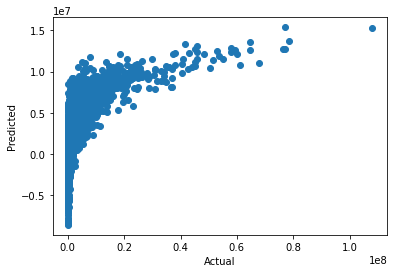

In [25]:
# plot the results- actual vs predicted 
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Demographics

In [260]:
# y variable/ target variable 
y= df_demo.Value_Euro

In [261]:
df_demo_prep = df_demo.dropna()

In [262]:
x=df_demo_prep .drop(columns="Value_Euro").values

In [263]:
x.shape

(17699, 3)

In [264]:
y.shape

(17954,)

In [265]:
# split into training and testing sets 
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=0)

x_train.shape

ValueError: Found input variables with inconsistent numbers of samples: [17699, 17954]

In [96]:
model =LinearRegression()
#fit the model- this needed to be a variable 
c = model.fit(x_train, y_train)
# Use model to predict on Test Data 
y_pred=c.predict(x_test)
print(y_pred)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

# Age

In [54]:
df_demo_prep = df_demo.dropna()

In [55]:
df_demo_prep.isnull().sum()

Age           0
Height_Cm     0
Weight_Kgs    0
Value_Euro    0
dtype: int64

In [56]:
y =df_demo_prep['Age']
x = df_demo_prep['Value_Euro']

In [57]:
# split into training and testing sets 
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=0)

x_train= x_train.values.reshape(-1, 1)
y_train= y_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1,1)

x_train.shape
# remember had to remove stratisfy because of small data size

(11799, 1)

In [58]:
model =LinearRegression()
c = model.fit(x_train, y_train)
# Use model to predict on Test Data 
y_pred=c.predict(x_test)
print(y_pred)

[[25.41854331]
 [25.55206666]
 [25.38304977]
 ...
 [25.40671213]
 [25.37696516]
 [25.80897235]]


In [59]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.007089806669253629


Text(0, 0.5, 'Predicted')

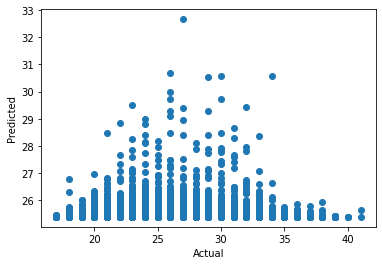

In [60]:
# plot the results- actual vs predicted 
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Height

In [97]:
df_demo_prep.isnull().sum()

Age           0
Height_Cm     0
Weight_Kgs    0
Value_Euro    0
dtype: int64

In [125]:
x =df_demo_prep['Value_Euro']
y = df_demo_prep['Height_Cm']

In [126]:
# split into training and testing sets 
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=0)

x_train= x_train.values.reshape(-1, 1)
y_train= y_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1,1)

x_train.shape
# remember had to remove stratisfy because of small data size

(11799, 1)

In [127]:
model =LinearRegression()
c = model.fit(x_train, y_train)
# Use model to predict on Test Data 
y_pred=c.predict(x_test)
print(y_pred)

[[174.89813205]
 [174.91694607]
 [174.89313086]
 ...
 [174.89646499]
 [174.89227351]
 [174.95314519]]


In [128]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.00017447565035488832


Text(0, 0.5, 'Predicted')

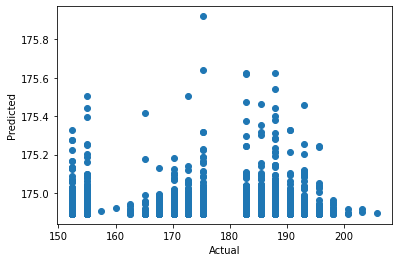

In [129]:
# plot the results- actual vs predicted 
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Weight_Kgs

In [120]:
y =df_demo_prep['Weight_Kgs']
x = df_demo_prep['Value_Euro']

In [121]:
# split into training and testing sets 
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=0)

x_train= x_train.values.reshape(-1, 1)
y_train= y_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1,1)

x_train.shape
# remember had to remove stratisfy because of small data size

(11799, 1)

In [122]:
model =LinearRegression()
c = model.fit(x_train, y_train)
# Use model to predict on Test Data 
y_pred=c.predict(x_test)
print(y_pred)

[[75.24366032]
 [75.33507   ]
 [75.21936155]
 ...
 [75.23556073]
 [75.21519604]
 [75.51094685]]


In [123]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.0028647269364426853


Text(0, 0.5, 'Predicted')

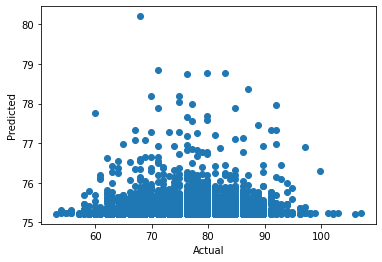

In [124]:
# plot the results- actual vs predicted 
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Crossing

In [61]:
y =df_skills['Crossing']

In [62]:
x = df_skills['Value_Euro']

In [63]:
y.shape

(17699,)

In [64]:
x.shape

(17699,)

In [65]:
# split into training and testing sets 
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=0)

x_train= x_train.values.reshape(-1, 1)
y_train= y_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1,1)

x_train.shape
# remember had to remove stratisfy because of small data size

(11799, 1)

In [66]:
model =LinearRegression()

In [67]:
#fit the model- this needed to be a variable 
c = model.fit(x_train, y_train)

In [68]:
# Use model to predict on Test Data 
y_pred=c.predict(x_test)
print(y_pred)

[[48.26300324]
 [49.94760785]
 [47.81519695]
 ...
 [48.11373448]
 [47.73843016]
 [53.1888724 ]]


In [69]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.05353633407683567


Text(0, 0.5, 'Predicted')

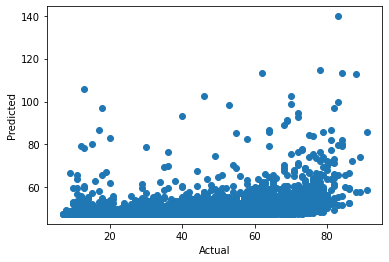

In [70]:
# plot the results- actual vs predicted 
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Finishing

In [146]:
x = df_skills['Finishing']
y = df_skills['Value_Euro']

In [147]:
#fit the model
fit = np.polyfit(x, np.log(y), 1)

#view the output of the model
print(fit)

[ 0.02977371 12.28234825]


In [148]:
# split into training and testing sets 
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=0)

x_train= x_train.values.reshape(-1, 1)
y_train= y_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1,1)

x_train.shape
# remember had to remove stratisfy because of small data size

(11799, 1)

In [149]:
model =LinearRegression()
c = model.fit(x_train, y_train)
# Use model to predict on Test Data 
y_pred=c.predict(x_test)
print(y_pred)

[[3418085.55252959]
 [3722426.58433496]
 [1211613.07194069]
 ...
 [3342000.29457825]
 [-462262.60298882]
 [4026767.61614032]]


In [150]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.06428550859042026


Text(0, 0.5, 'Predicted')

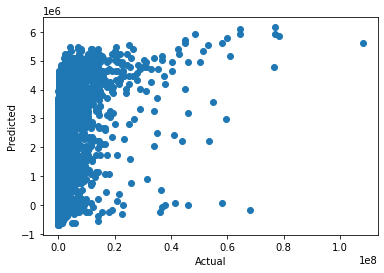

In [151]:
# plot the results- actual vs predicted 
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Dribbling

In [76]:
y =df_skills['Dribbling']
x = df_skills['Value_Euro']

In [77]:
# split into training and testing sets 
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=0)

x_train= x_train.values.reshape(-1, 1)
y_train= y_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1,1)

x_train.shape
# remember had to remove stratisfy because of small data size

(11799, 1)

In [78]:
model =LinearRegression()
c = model.fit(x_train, y_train)
# Use model to predict on Test Data 
y_pred=c.predict(x_test)
print(y_pred)

[[53.69055037]
 [55.55792312]
 [53.19416015]
 ...
 [53.52508696]
 [53.10906468]
 [59.15084284]]


In [79]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.06704560499232148


Text(0, 0.5, 'Predicted')

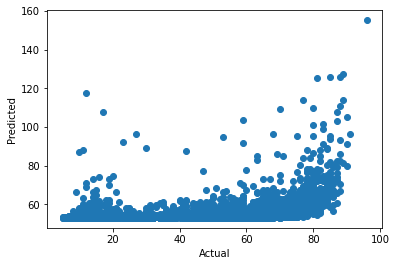

In [80]:
# plot the results- actual vs predicted 
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')